# 0 - Installed the packages

In [1]:
%pip install pandas matplotlib numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 0.5 - Loading necessary packages

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 1 - Data Loading and Exploration

- Dataset [link](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation?resource=download)

In [5]:
# Load the dataset
data_path = 'bank_transactions.csv'
data = pd.read_csv(data_path)

# Display the first few rows
data.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [11]:
data["TransactionAmount (INR)"].max()

1560034.99

In [12]:
data["TransactionAmount (INR)"].min()

0.0

In [6]:
# Summary of the dataset
data.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1048567,1048567,1045170,1047467,1048416,1.046198e+06,1048567,1.048567e+06,1.048567e+06
unique,1048567,884265,17254,3,9355,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,57339,765530,103595,NaN,27261,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.154035e+05,NaN,1.570875e+05,1.574335e+03
std,NaN,NaN,NaN,NaN,NaN,8.464854e+05,NaN,5.126185e+04,6.574743e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.721760e+03,NaN,1.240300e+05,1.610000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.679218e+04,NaN,1.642260e+05,4.590300e+02
75%,NaN,NaN,NaN,NaN,NaN,5.765736e+04,NaN,2.000100e+05,1.200000e+03


## Observations
- Missing Values: Some columns like CustomerDOB, CustGender, and CustLocation have missing data that needs to be handled.
- Data Types: Need to verify and possibly convert data types (e.g., converting TransactionDate and CustomerDOB into date format).
- Potential Anomalies: The 'CustGender' column has 3 unique values, suggesting possible data entry errors or an unspecified gender category.

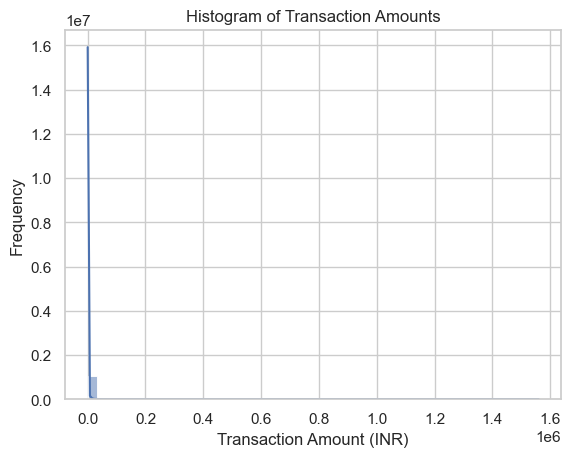

In [31]:
# Histogram of Transaction Amounts
sns.histplot(data['TransactionAmount (INR)'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


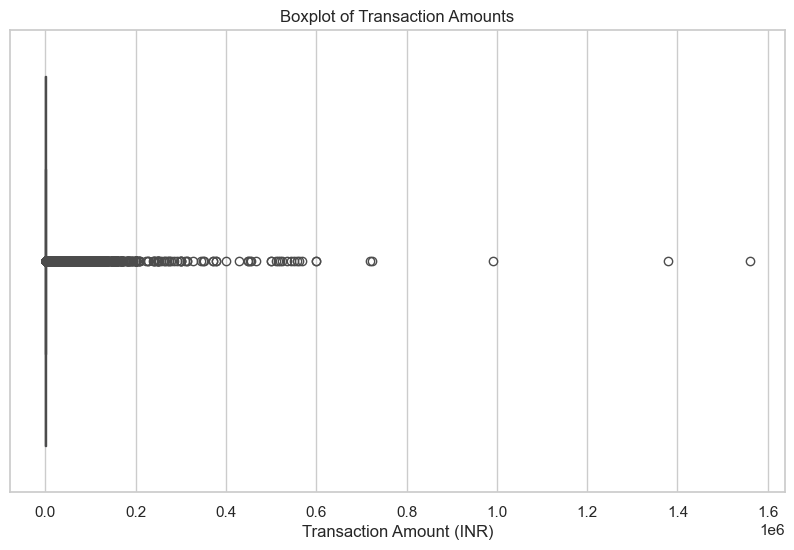

In [32]:
# Generate a boxplot for the Transaction Amounts to visualize outliers and distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['TransactionAmount (INR)'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.show()



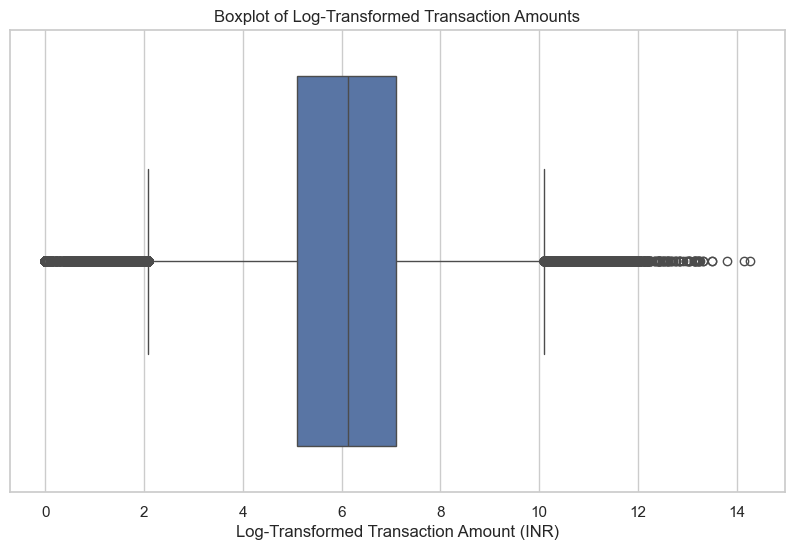

In [33]:
# Apply a log transformation to deal with extreme values
data['Log Transaction Amount'] = np.log1p(data['TransactionAmount (INR)'])

# Creating the boxplot for the log-transformed data
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Log Transaction Amount'])
plt.title('Boxplot of Log-Transformed Transaction Amounts')
plt.xlabel('Log-Transformed Transaction Amount (INR)')
plt.show()


### Summary

- **Median**: The typical transaction amount is around 403.43 INR.
- **Variability**: There's a moderate spread in the transaction amounts within the middle 50%.
- **Outliers**: There are several high-value transactions, even after log transformation, indicating a right-skewed distribution.
- **Log Transformation**: This transformation helps in normalizing the data to some extent, making the central tendency and variability clearer and reducing the impact of extreme values.


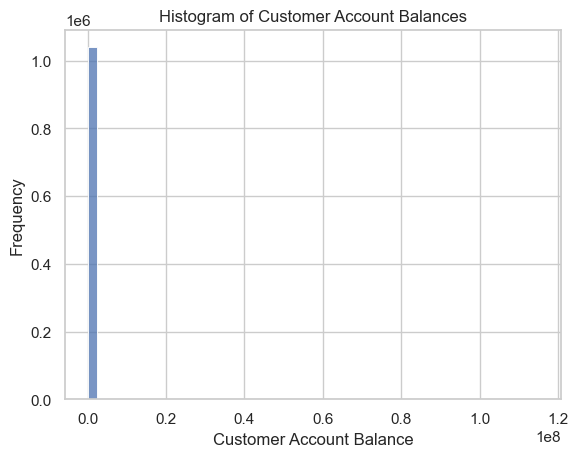

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Customer Account Balances
sns.histplot(data['CustAccountBalance'].dropna(), bins=50)
plt.title('Histogram of Customer Account Balances')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')
plt.show()


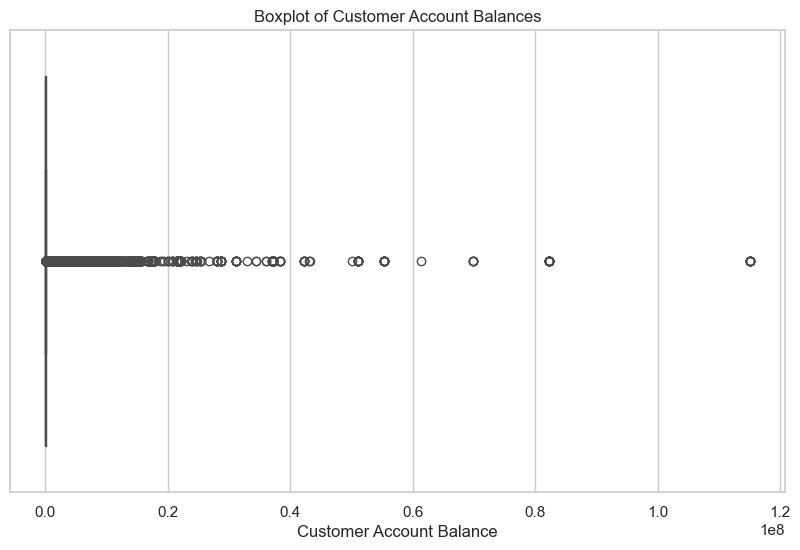

In [35]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['CustAccountBalance'])
plt.title('Boxplot of Customer Account Balances')
plt.xlabel('Customer Account Balance')
plt.show()

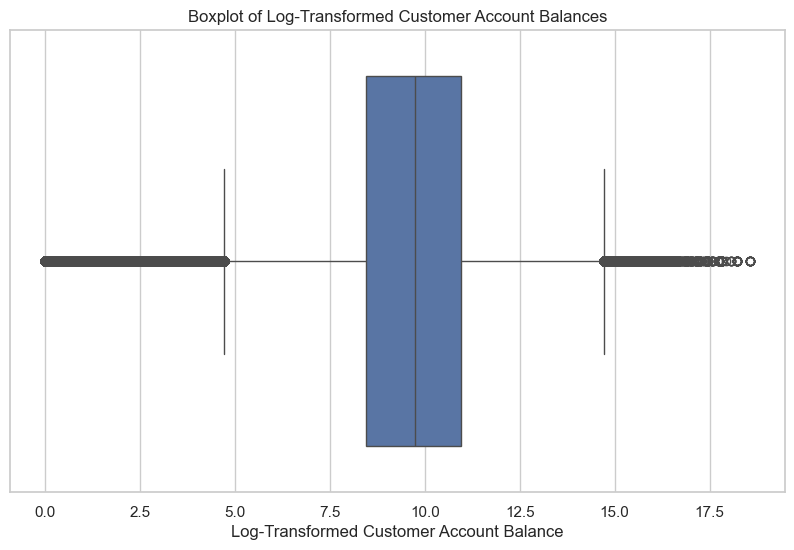

In [36]:
# Apply a log transformation to deal with extreme values
data['Log CustAccountBalance'] = np.log1p(data['CustAccountBalance'])

# Creating the boxplot for the log-transformed data
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Log CustAccountBalance'])
plt.title('Boxplot of Log-Transformed Customer Account Balances')
plt.xlabel('Log-Transformed Customer Account Balance')
plt.show()

### Summary

- **Median**: The typical customer account balance is around 22,026.47 INR.
- **Variability**: The middle 50% of the customers have account balances ranging from approximately 2,980.96 INR to 59,874.14 INR.
- **Outliers**: There are several customers with very high account balances, even after log transformation, showing a right-skewed distribution.
- **Log Transformation**: This transformation helps normalize the data, reducing the effect of extreme values, and making the central tendency and variability clearer.


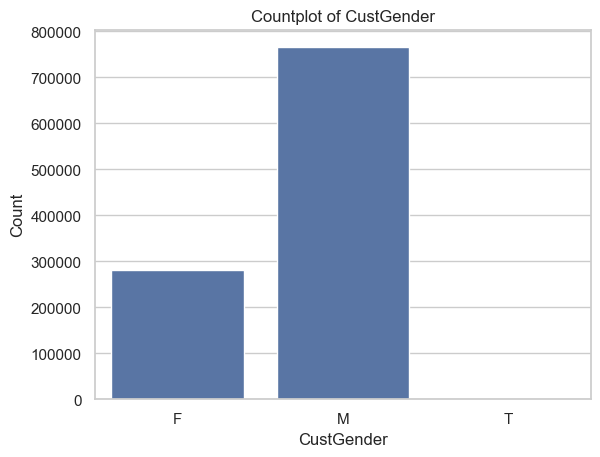

In [37]:
# Countplot of Customer Gender
sns.countplot(x='CustGender', data=data)
plt.title('Countplot of CustGender')
plt.xlabel('CustGender')
plt.ylabel('Count')
plt.show()


### Summary

- The dataset has a significant gender imbalance with a higher number of male customers compared to female customers.
- The 'T' category needs further investigation to determine its origin and appropriate handling.
- Understanding and addressing these discrepancies is crucial for accurate customer segmentation and targeted strategies.


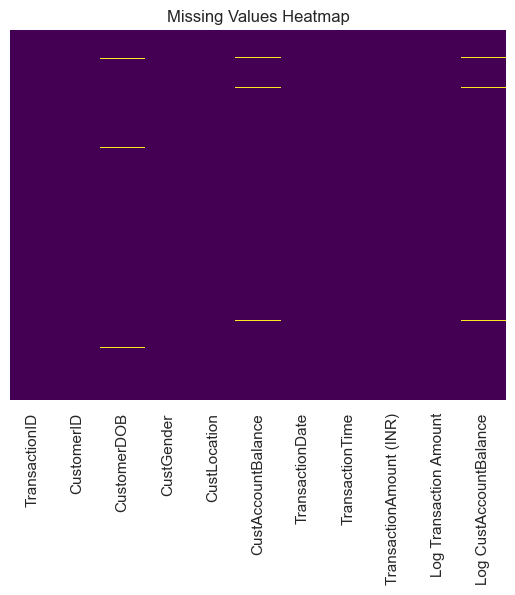

In [38]:
# Missing Values Heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Summary

- **CustomerDOB**: Address missing values through imputation (e.g., median age) or by excluding these records if age is crucial for segmentation.
- **CustGender**: Missing entries can be categorized as 'Unknown' or imputed based on other demographic data.
- **CustLocation**: Impute missing locations with the most frequent value or use nearest neighbors if location data is important.
- **CustAccountBalance**: Imputation with median or mean values can help preserve financial analysis integrity.


In [41]:
# Calculating exact counts of missing data
missing_data_counts = data.isnull().sum()
print(missing_data_counts)


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
Log Transaction Amount        0
Log CustAccountBalance     2369
dtype: int64


In [45]:
# Remove records with 'T' in CustGender
data = data[data['CustGender'] != 'T'].copy()
data['CustGender'].value_counts()


CustGender
M    766630
F    281936
Name: count, dtype: int64

In [47]:
# Handling missing CustomerDOB with median year
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')
median_year = int(data['CustomerDOB'].dt.year.median())
data.loc[data['CustomerDOB'].isnull(), 'CustomerDOB'] = pd.Timestamp(f'{median_year}-01-01')

# Handling missing CustGender with mode
mode_gender = data['CustGender'].mode()[0]
data.loc[data['CustGender'].isnull(), 'CustGender'] = mode_gender

# Handling missing CustLocation with mode
mode_location = data['CustLocation'].mode()[0]
data.loc[data['CustLocation'].isnull(), 'CustLocation'] = mode_location

# Handling missing CustAccountBalance with median
median_balance = data['CustAccountBalance'].median()
data.loc[data['CustAccountBalance'].isnull(), 'CustAccountBalance'] = median_balance


In [52]:
# 1. Age Calculation
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])
current_year = pd.to_datetime('today').year
data['Age'] = current_year - data['CustomerDOB'].dt.year

# 2. Transaction Time Binning
# Convert TransactionTime to string and ensure proper format
data['TransactionTime'] = data['TransactionTime'].astype(str).str.zfill(6)

# Parse the TransactionTime
def parse_transaction_time(time_str):
    try:
        return pd.to_datetime(time_str, format='%H%M%S').time()
    except ValueError:
        return np.nan

data['TransactionTime'] = data['TransactionTime'].apply(parse_transaction_time)

# Extracting hour from TransactionTime
data['TransactionHour'] = data['TransactionTime'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)

# Binning the TransactionHour into parts of the day
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['TimeOfDay'] = pd.cut(data['TransactionHour'].fillna(0), bins=bins, labels=labels, right=False, include_lowest=True)

# 3. Aggregated Features
# Total number of transactions per customer
total_transactions = data.groupby('CustomerID').size().reset_index(name='TotalTransactions')

# Average transaction amount per customer
average_transaction_amount = data.groupby('CustomerID')['TransactionAmount (INR)'].mean().reset_index(name='AvgTransactionAmount')

# Total transaction amount per customer
total_transaction_amount = data.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='TotalTransactionAmount')

# Merge the aggregated features into one dataframe
aggregated_data = total_transactions.merge(average_transaction_amount, on='CustomerID').merge(total_transaction_amount, on='CustomerID')

# Merge the aggregated features back to the main dataset
data = data.merge(aggregated_data, on='CustomerID')

data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Log Transaction Amount,...,TimeOfDay,TotalTransactions_x,AvgTransactionAmount_x,TotalTransactionAmount_x,TotalTransactions_y,AvgTransactionAmount_y,TotalTransactionAmount_y,TotalTransactions,AvgTransactionAmount,TotalTransactionAmount
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,NaN,25.0,3.258097,...,Night,1,25.0,25.0,1,25.0,25.0,1,25.0,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,NaN,27999.0,10.239960,...,Night,1,27999.0,27999.0,1,27999.0,27999.0,1,27999.0,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,NaN,459.0,6.131226,...,Night,1,459.0,459.0,1,459.0,459.0,1,459.0,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,NaN,2060.0,7.630947,...,Night,2,1469.2,2938.4,2,1469.2,2938.4,2,1469.2,2938.4
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,NaN,1762.5,7.475056,...,Night,1,1762.5,1762.5,1,1762.5,1762.5,1,1762.5,1762.5


In [53]:
# Save the dataset with the new features
data.to_csv('dataset_with_features.csv', index=False)

In [55]:
# Display summary statistics
summary_statistics = data.describe()

summary_statistics

,CustomerDOB,CustAccountBalance,TransactionTime,TransactionAmount (INR),Log Transaction Amount,Log CustAccountBalance,Age,TransactionHour,TotalTransactions_x,AvgTransactionAmount_x,TotalTransactionAmount_x,TotalTransactions_y,AvgTransactionAmount_y,TotalTransactionAmount_y,TotalTransactions,AvgTransactionAmount,TotalTransactionAmount
count,1048566,1.048566e+06,0.0,1.048566e+06,1.048566e+06,1.046197e+06,1.048566e+06,0.0,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06,1.048566e+06
mean,1984-04-25 03:49:39.211608896,1.151808e+05,NaN,1.574306e+03,6.051921e+00,9.442073e+00,4.014828e+01,NaN,1.357095e+00,1.574306e+03,2.136015e+03,1.357095e+00,1.574306e+03,2.136015e+03,1.357095e+00,1.574306e+03,2.136015e+03
min,1800-01-01 00:00:00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+01,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1983-08-15 00:00:00,4.740200e+03,NaN,1.610000e+02,5.087596e+00,8.460149e+00,3.200000e+01,NaN,1.000000e+00,2.000000e+02,2.270000e+02,1.000000e+00,2.000000e+02,2.270000e+02,1.000000e+00,2.000000e+02,2.270000e+02
50%,1988-09-30 00:00:00,1.679218e+04,NaN,4.590300e+02,6.131292e+00,9.728728e+00,3.600000e+01,NaN,1.000000e+00,5.010950e+02,6.560000e+02,1.000000e+00,5.010950e+02,6.560000e+02,1.000000e+00,5.010950e+02,6.560000e+02
75%,1992-06-22 00:00:00,5.747288e+04,NaN,1.200000e+03,7.090910e+00,1.096229e+01,4.100000e+01,NaN,2.000000e+00,1.284333e+03,1.800000e+03,2.000000e+00,1.284333e+03,1.800000e+03,2.000000e+00,1.284333e+03,1.800000e+03
max,2073-12-31 00:00:00,1.150355e+08,NaN,1.560035e+06,1.426022e+01,1.856075e+01,2.240000e+02,NaN,6.000000e+00,1.560035e+06,1.560035e+06,6.000000e+00,1.560035e+06,1.560035e+06,6.000000e+00,1.560035e+06,1.560035e+06
std,NaN,8.455420e+05,NaN,6.574677e+03,1.604044e+00,2.500560e+00,4.972402e+01,NaN,6.120594e-01,6.132149e+03,7.605101e+03,6.120594e-01,6.132149e+03,7.605101e+03,6.120594e-01,6.132149e+03,7.605101e+03


In [56]:
# Display first few rows of the dataset
first_rows = data.head()

first_rows

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Log Transaction Amount,...,TimeOfDay,TotalTransactions_x,AvgTransactionAmount_x,TotalTransactionAmount_x,TotalTransactions_y,AvgTransactionAmount_y,TotalTransactionAmount_y,TotalTransactions,AvgTransactionAmount,TotalTransactionAmount
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,NaN,25.0,3.258097,...,Night,1,25.0,25.0,1,25.0,25.0,1,25.0,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,NaN,27999.0,10.239960,...,Night,1,27999.0,27999.0,1,27999.0,27999.0,1,27999.0,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,NaN,459.0,6.131226,...,Night,1,459.0,459.0,1,459.0,459.0,1,459.0,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,NaN,2060.0,7.630947,...,Night,2,1469.2,2938.4,2,1469.2,2938.4,2,1469.2,2938.4
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,NaN,1762.5,7.475056,...,Night,1,1762.5,1762.5,1,1762.5,1762.5,1,1762.5,1762.5
